In [1]:
!pip install -q torch torchvision opencv-python-headless

import torch
import torchvision
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from torchvision import transforms


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:02<00:00, 79.1MB/s]


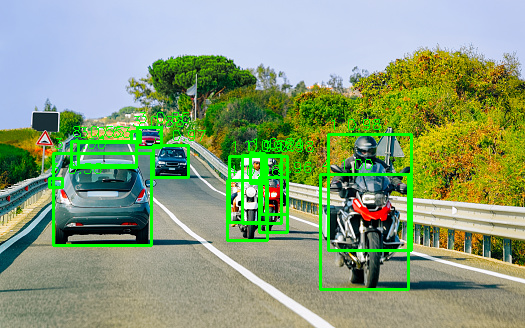

In [2]:

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load image
img_path = "carsbikes.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Transform image
transform = transforms.Compose([
    transforms.ToTensor()
])

img_tensor = transform(img_rgb)
img_tensor = img_tensor.unsqueeze(0)

# Run inference
with torch.no_grad():
    outputs = model(img_tensor)

# Draw boxes
for box, score, label in zip(
    outputs[0]['boxes'],
    outputs[0]['scores'],
    outputs[0]['labels']
):
    if score > 0.5:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, f"{label.item()} {score:.2f}",
                    (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5,
                    (0,255,0),
                    1)

cv2_imshow(img)
